In [1]:
# import os
# project_root = os.path.dirname(os.getcwd())
# os.chdir(project_root)

In [2]:
import pandas as pd
import numpy as np
import configparser
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load configuration
config = configparser.ConfigParser()
config_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'config.ini'))
config.read('config.ini')

plt.rcParams["figure.figsize"] = tuple(int(s) for s in (config['settings']['fig_size'].strip("()").split(',')))

artist_df = pd.read_csv(config['files']['artist_data'])

In [4]:
artist_df.head()

,id,name,artist_popularity,artist_genres,followers,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,['minneapolis punk'],184,minneapolis punk,NaN,NaN,NaN,NaN,NaN,NaN
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,['antiviral pop'],491,antiviral pop,NaN,NaN,NaN,NaN,NaN,NaN
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,['8d'],56,8d,NaN,NaN,NaN,NaN,NaN,NaN
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,['action rock'],394,action rock,NaN,NaN,NaN,NaN,NaN,NaN
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,['tribute'],230,tribute,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
artist_df.shape

(37012, 12)

In [6]:
artist_df.describe()

,artist_popularity,followers,genre_5,genre_6
count,37012.000000,3.701200e+04,0.0,0.0
mean,15.440073,2.224654e+05,NaN,NaN
std,18.958256,2.192633e+06,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,0.000000,3.800000e+01,NaN,NaN
50%,7.000000,3.020000e+02,NaN,NaN
75%,26.000000,4.437000e+03,NaN,NaN
max,100.000000,1.159989e+08,NaN,NaN


In [7]:
artist_df.isnull().sum()

id                       0
name                     0
artist_popularity        0
artist_genres            0
followers                0
genre_0              26065
genre_1              32192
genre_2              34572
genre_3              35647
genre_4              36294
genre_5              37012
genre_6              37012
dtype: int64

In [8]:
# Dropping the columns where more than 90% values are missing.
artist_df.drop(['genre_3','genre_4','genre_5','genre_6'], axis=1, inplace=True)

# Dropping the artist_genres column.
artist_df.drop(['artist_genres'], axis=1, inplace=True)

# Renaming the column 
artist_df.rename(columns={'id':'ID',
                         'name':'Name',
                         'artist_popularity':'Popularity',
                         'followers':'Followers',
                         'genre_0':'Genre_0',
                         'genre_1':'Genre_1',
                         'genre_2':'Genre_2' 
                         },inplace=True)

# Replacing missing genre for artists with Unknown
artist_df['Genre_0'].fillna('Unknown',inplace=True)

# Dropping the duplicate data based on the artist Name
artist_df.drop_duplicates(subset='Name',keep='first',inplace=True)

In [9]:
''' 
    Function to assign social influence level to the artists based on the number of followers data.
    Nano Influencers – 1-10k followers
    Micro Influencers – 10-100k followers
    Macro Influencers – 100k-1 Million followers
    Mega Influencers – 1 Million+ followers
    
'''

def influence_level(followers):
    if followers >= 1000000:
        return "Celebrity Artist"
    elif 100000 <= followers < 1000000:
        return "Macro Influencer"
    elif 10000 <= followers < 100000:
        return "Micro Influencer"
    else:
        return "Nano influencer"

In [10]:
# Apply the lambda to the artist dataframe
artist_df['Social_Status'] = artist_df.apply(lambda row: influence_level(row['Followers']), axis=1)

In [11]:
artist_df.head(5)

,ID,Name,Popularity,Followers,Genre_0,Genre_1,Genre_2,Social_Status
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,184,minneapolis punk,NaN,NaN,Nano influencer
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,491,antiviral pop,NaN,NaN,Nano influencer
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,56,8d,NaN,NaN,Nano influencer
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,394,action rock,NaN,NaN,Nano influencer
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,230,tribute,NaN,NaN,Nano influencer


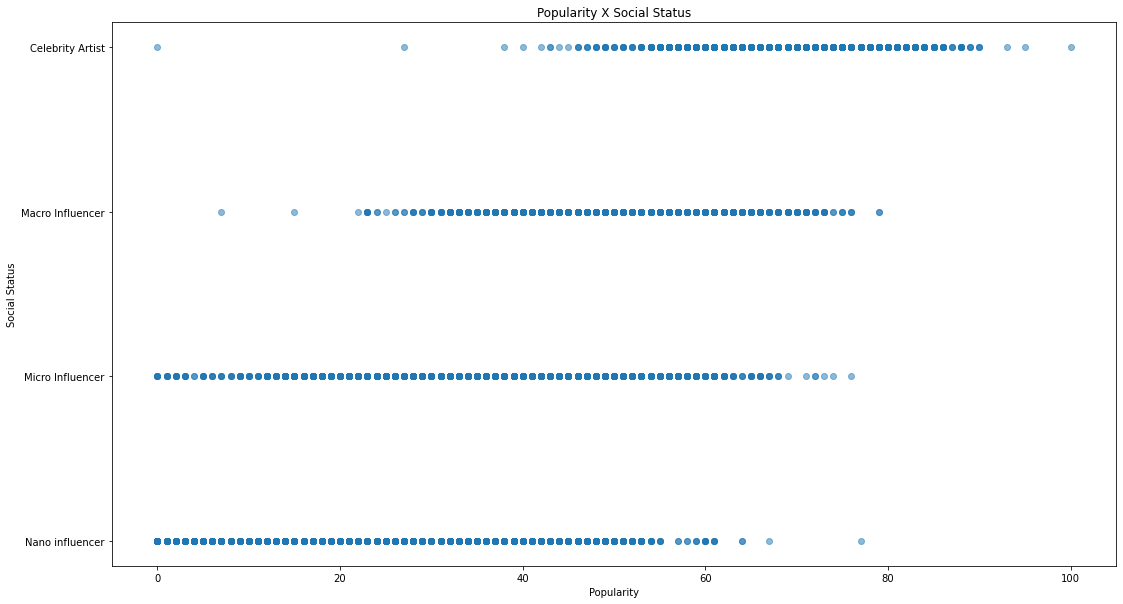

In [12]:
# SCATTER PLOT: Popularity X Social status

plt.scatter(artist_df['Popularity'],artist_df['Social_Status'],alpha=0.5 )
#Adding the aesthetics
plt.title('Popularity X Social Status')
plt.xlabel('Popularity')
plt.ylabel('Social Status') 
#Show the plot
plt.show()

In [13]:
artist_df[(artist_df['Popularity']<10) & (artist_df['Followers']>1000000)]

,ID,Name,Popularity,Followers,Genre_0,Genre_1,Genre_2,Social_Status
2201,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2316620,Unknown,NaN,NaN,Celebrity Artist


In [14]:
# Applying min max normalisation to the Popularity and Followers columns 

scaler = MinMaxScaler()
scaler.fit(np.array(artist_df['Popularity']).reshape(-1,1))
artist_df['norm_Popularity']=scaler.transform(np.array(artist_df['Popularity']).reshape(-1,1))

In [15]:
scaler.fit(np.array(artist_df['Followers']).reshape(-1,1))
artist_df['norm_Followers']=scaler.transform(np.array(artist_df['Followers']).reshape(-1,1))

In [16]:
# Giving extra weightage to popularity as we observed that the outlier artist White Noise Radiance has many listeners on spotify
# but the number of followers on social media is less, because it makes generic music.
weight_popularity = 0.6
weight_followers = 0.4

artist_df['Overall_Popularity'] = (weight_popularity * artist_df['norm_Popularity']) + \
                           (weight_followers * artist_df['norm_Followers'])

In [17]:
artist_df.head()

,ID,Name,Popularity,Followers,Genre_0,Genre_1,Genre_2,Social_Status,norm_Popularity,norm_Followers,Overall_Popularity
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,184,minneapolis punk,NaN,NaN,Nano influencer,0.0,1.586222e-06,6.344886e-07
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,491,antiviral pop,NaN,NaN,Nano influencer,0.0,4.232798e-06,1.693119e-06
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,56,8d,NaN,NaN,Nano influencer,0.0,4.827631e-07,1.931052e-07
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,394,action rock,NaN,NaN,Nano influencer,0.0,3.396583e-06,1.358633e-06
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,230,tribute,NaN,NaN,Nano influencer,0.0,1.982777e-06,7.931108e-07


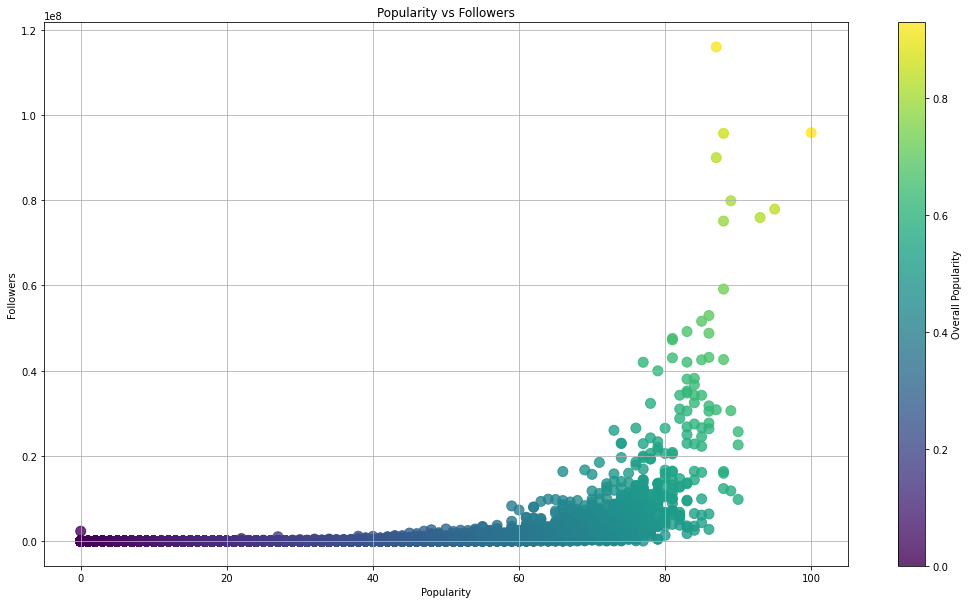

In [18]:
# SCATTER PLOT: Popularity X Followers
plt.scatter(artist_df['Popularity'], artist_df['Followers'], c=artist_df['Overall_Popularity'], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Overall Popularity')
plt.xlabel('Popularity')
plt.ylabel('Followers')
plt.title('Popularity vs Followers')
plt.grid(True)
plt.show()

In [19]:
top_10_artists = artist_df.nlargest(10, 'Overall_Popularity')
top_10_artists[['Name', 'Overall_Popularity']]

,Name,Overall_Popularity
37011,Taylor Swift,0.930552
36994,Ed Sheeran,0.922000
36995,Ariana Grande,0.858041
37009,Bad Bunny,0.838732
36993,Billie Eilish,0.832336
37008,The Weeknd,0.819885
37004,Eminem,0.809489
36997,Justin Bieber,0.787010
36999,Rihanna,0.731974
36985,Bruno Mars,0.698577


In [20]:
artist_df.head()

,ID,Name,Popularity,Followers,Genre_0,Genre_1,Genre_2,Social_Status,norm_Popularity,norm_Followers,Overall_Popularity
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,184,minneapolis punk,NaN,NaN,Nano influencer,0.0,1.586222e-06,6.344886e-07
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,491,antiviral pop,NaN,NaN,Nano influencer,0.0,4.232798e-06,1.693119e-06
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,56,8d,NaN,NaN,Nano influencer,0.0,4.827631e-07,1.931052e-07
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,394,action rock,NaN,NaN,Nano influencer,0.0,3.396583e-06,1.358633e-06
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,230,tribute,NaN,NaN,Nano influencer,0.0,1.982777e-06,7.931108e-07


In [21]:
# Uncomment to see the original dataframe
original_artist_df = pd.read_csv(config['files']['artist_data'])
original_artist_df.head()


,id,name,artist_popularity,artist_genres,followers,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,['minneapolis punk'],184,minneapolis punk,NaN,NaN,NaN,NaN,NaN,NaN
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,['antiviral pop'],491,antiviral pop,NaN,NaN,NaN,NaN,NaN,NaN
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,['8d'],56,8d,NaN,NaN,NaN,NaN,NaN,NaN
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,['action rock'],394,action rock,NaN,NaN,NaN,NaN,NaN,NaN
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,['tribute'],230,tribute,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
artist_df.to_csv(config['directories']['clean_data']+"artist_data.csv", index=False)

In [ ]:
del artist_df
del original_artist_df